In [829]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [830]:
df = pd.read_csv("PostCovidEconomy.csv")
df.drop(axis=1, columns= "ticker", inplace=True)
df.rename(inplace=True, axis=1, mapper={'open':'openning price'})

# Data Wrangling

In [831]:
df.head()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,openning price,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,0.6511,0.6684,0.6371,0.6666


In [832]:
df.isnull().sum()

country                0
date                   0
manufacturing pmi      0
services pmi           0
consumer confidence    0
interest rates         0
cpi yoy                0
core cpi               0
unemployment rate      0
gdp yoy                0
openning price         0
high                   0
low                    0
close                  0
dtype: int64

In [833]:
df.sort_values(by="date", ascending =True, inplace=True)

In [834]:
df.dtypes

country                 object
date                    object
manufacturing pmi      float64
services pmi           float64
consumer confidence    float64
interest rates          object
cpi yoy                 object
core cpi                object
unemployment rate       object
gdp yoy                 object
openning price         float64
high                   float64
low                    float64
close                  float64
dtype: object

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              432 non-null    object 
 1   date                 432 non-null    object 
 2   manufacturing pmi    432 non-null    float64
 3   services pmi         432 non-null    float64
 4   consumer confidence  432 non-null    float64
 5   interest rates       432 non-null    object 
 6   cpi yoy              432 non-null    object 
 7   core cpi             432 non-null    object 
 8   unemployment rate    432 non-null    object 
 9   gdp yoy              432 non-null    object 
 10  openning price       432 non-null    float64
 11  high                 432 non-null    float64
 12  low                  432 non-null    float64
 13  close                432 non-null    float64
dtypes: float64(7), object(7)
memory usage: 50.6+ KB


In [836]:
df['country'].unique()

array(['australia', 'united states', 'europe', 'canada', 'switzerland',
       'japan', 'china', 'united kingdom', 'new zealand'], dtype=object)

In [837]:
df.describe()

,manufacturing pmi,services pmi,consumer confidence,openning price,high,low,close
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,51.878935,51.111968,42.679051,25.934223,26.467713,25.493275,26.020603
std,6.121829,7.205442,51.862085,45.859841,46.860450,45.028341,46.039390
min,26.000000,12.000000,-52.500000,0.559300,0.587400,0.547000,0.559400
25%,48.275000,48.600000,-10.525000,0.910300,0.921625,0.891900,0.908800
50%,51.100000,51.850000,49.290000,1.257650,1.281150,1.230350,1.257150
75%,55.925000,55.200000,86.850000,7.063525,7.131225,6.979650,7.082575
max,70.000000,67.600000,127.000000,151.710000,151.960000,147.380000,151.670000


In [838]:
df.shape

(432, 14)

# Data Visualization

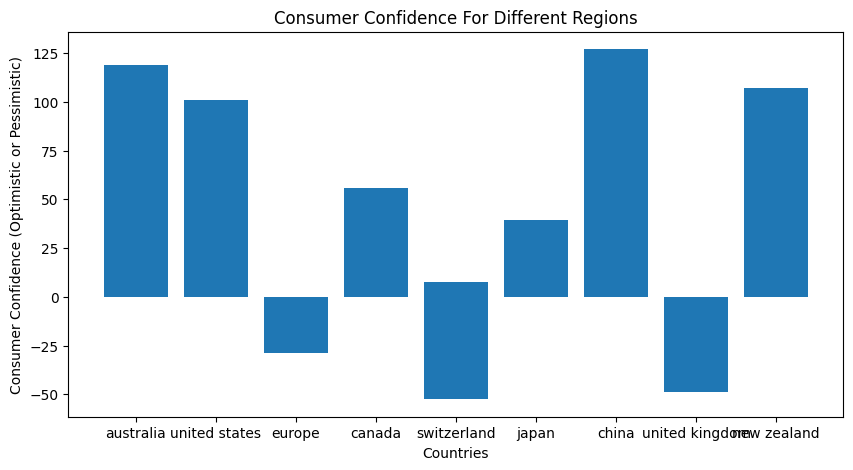

In [839]:
fig = plt.figure(figsize=(10, 5))

plt.bar(df['country'], df['consumer confidence'])
plt.xlabel("Countries")
plt.ylabel("Consumer Confidence (Optimistic or Pessimistic)")
plt.title("Consumer Confidence For Different Regions")
plt.show()

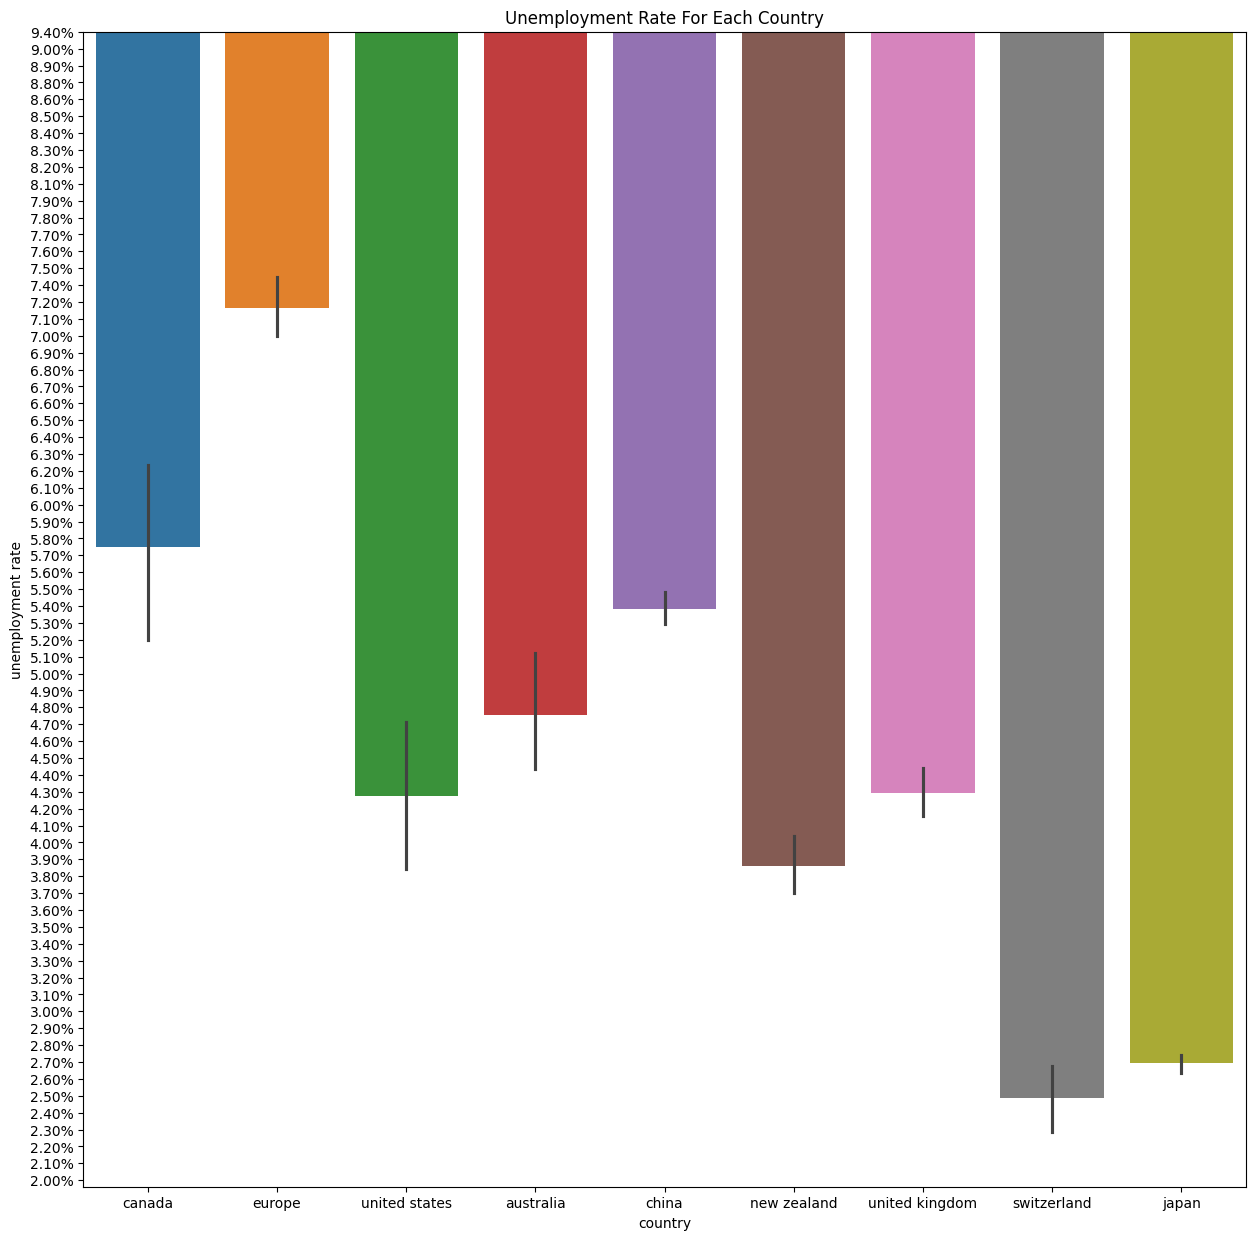

In [840]:
fig = plt.figure(figsize=(15,15))

bar = df.copy()
bar.sort_values("unemployment rate", ascending=False, inplace = True)
sns.barplot(x=bar["country"] ,y=bar["unemployment rate"], hue=bar['country'])

plt.title("Unemployment Rate For Each Country")
plt.show()

In [841]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [842]:
heatmap = df.copy()


labelEncoder = LabelEncoder()

columns = heatmap.select_dtypes(include='object').columns

for col in columns:
    heatmap[col] = labelEncoder.fit_transform(heatmap[col])

<Axes: >

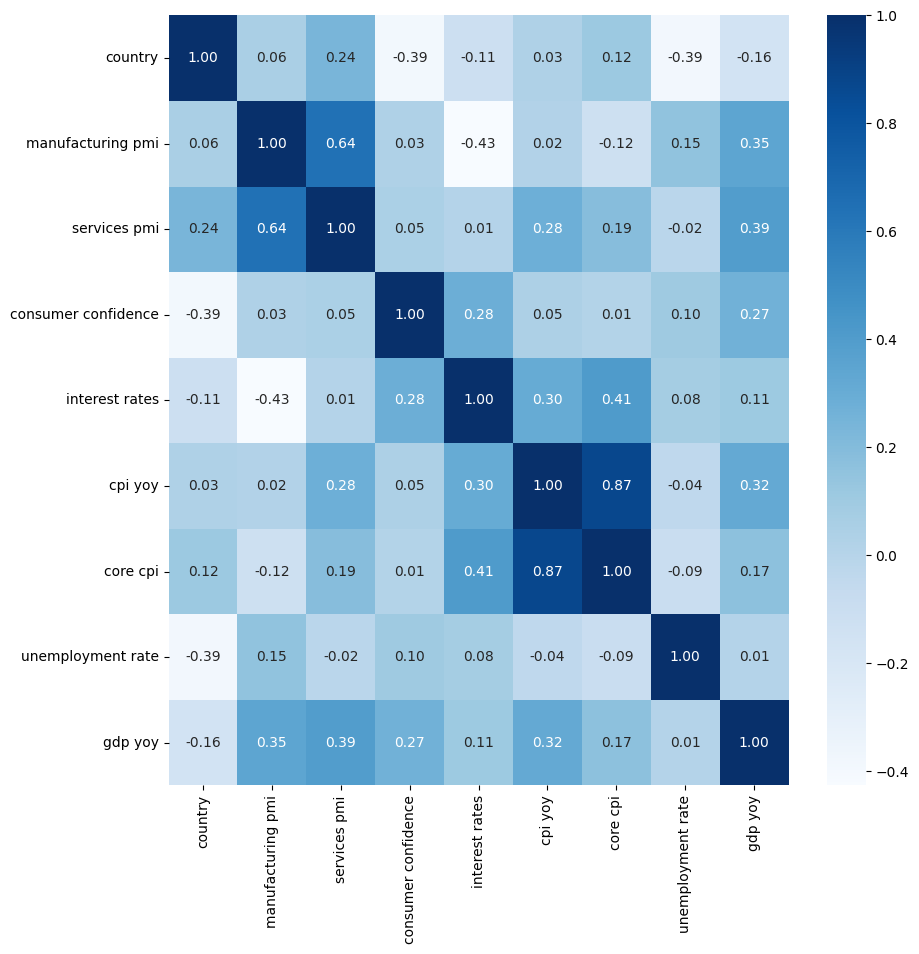

In [843]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(heatmap.drop(axis=1,columns=["date", "openning price", 'high', 'low', 'close']).corr(), annot=True, fmt=".2f", cmap="Blues") 

# Machine Learning

In [844]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge

In [845]:
parameters1 = {'alpha': [0.001,0.1, 0.01, 1, 10,100,1000, 10000, 100000]}
model = Ridge()

## Ridge Regression

In [846]:
predict = df.copy()


labelEncoder = LabelEncoder()

columns = predict.select_dtypes(include='object').columns

for col in columns:
    predict[col] = labelEncoder.fit_transform(predict[col])

In [847]:
X = predict.drop(axis=1, columns='core cpi')


In [848]:
transform = StandardScaler()

X = transform.fit_transform(X)


In [849]:
y = predict['core cpi']

In [850]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [851]:
grid1 = GridSearchCV(model, parameters1, cv=4)

In [852]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.1, 0.01, 1, 10, 100, 1000, 10000,
                                   100000]})

In [853]:
scoring = grid1.best_estimator_

In [854]:
print("tuned hpyerparameters :(best parameters) ",grid1.best_params_)
print("accuracy :",grid1.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 1}
accuracy : 0.8056372167085624


In [855]:
scoring.score(X_test, y_test)

0.8393633768457883

In [856]:
yhat = grid1.predict(X_test)

np.round(yhat, 2)

array([52.29, 73.98,  6.61, 11.43, 55.55, 25.45, 62.03, 36.89, 13.36,
       76.02, 35.35, 19.13, 52.33,  7.77, 20.55, 11.84, 41.91, 57.62,
       31.44, 38.47, 69.39, 54.54, 35.76, 12.08, 68.22, 19.49, 14.5 ,
       12.3 , 66.47, 22.56, 15.04, 68.05, 31.37, 28.73, 32.63,  2.36,
       70.37, 66.91, 69.82, 19.07,  5.87, 70.2 , 41.06,  9.98, 46.16,
        3.34, 47.59, 64.38, 23.98, 64.84, 58.45, 40.78, 27.72, 67.92,
       10.46, 52.22, 70.63, 22.1 , 38.95, 24.25, 37.62, 41.61, 47.1 ,
       21.09, 10.87, 11.18, 21.7 , 68.16, 59.5 , 14.27, 42.69, 44.07,
        7.04, 39.14, 20.47, 60.24, 41.81, 61.96, 39.01, 20.05, 67.7 ,
       23.5 , 59.01, 19.52, 32.83, 17.73, 40.15])

In [857]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [858]:
mse = mean_squared_error(y_test, yhat)
mse

np.float64(93.83844396627703)

In [859]:
rmse = np.sqrt(mse)
rmse

np.float64(9.687024515622793)

In [860]:
score = cross_val_score(grid1, X_train, y_train, cv=10)
score

array([0.81927861, 0.86969992, 0.890778  , 0.695456  , 0.86251809,
       0.72852825, 0.72736458, 0.71596264, 0.89597447, 0.85512094])

In [861]:
round(np.mean(score), 2)

np.float64(0.81)

## Random Forest Regression

In [862]:
from sklearn.ensemble import RandomForestRegressor


params = {'n_estimators': [25, 50, 100], 
          'min_samples_split': [2,4,8],
          'bootstrap': [True, False]
         }
          

model = RandomForestRegressor()

grid1 = GridSearchCV(estimator=model, param_grid=params, cv=4)

grid1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [25, 50, 100]})

In [863]:
predict = grid1.best_estimator_

In [864]:
print("tuned hpyerparameters :(best parameters) ",grid1.best_params_)
print("accuracy :",grid1.best_score_)

tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 100}
accuracy : 0.9477137590506958


In [865]:
predict.score(X_test, y_test)

0.9714597195283466

In [866]:
yhat = grid1.predict(X_test)

np.round(yhat, 2)

array([51.43, 70.94, 14.78,  9.22, 51.79, 17.44, 73.64, 25.71,  3.24,
       53.01, 29.66, 21.61, 51.74, 20.92, 19.14, 13.86, 40.34, 61.41,
       31.28, 67.95, 79.17, 66.61, 33.43,  6.3 , 79.16, 21.08,  5.36,
        7.65, 68.64, 17.  , 14.23, 78.63, 21.49, 26.96, 28.2 ,  5.08,
       74.14, 74.59, 79.25, 25.18, 15.95, 52.32, 38.44, 19.66, 33.6 ,
       14.32, 45.05, 75.68, 27.93, 75.84, 58.77, 41.28, 23.19, 75.78,
        7.54, 52.91, 72.58, 21.6 , 20.46, 20.69, 27.02, 37.24, 41.03,
       16.27, 10.53, 12.8 , 41.49, 57.92, 72.96, 18.34, 35.13, 36.46,
       16.72, 68.59, 21.72, 60.94, 30.07, 61.14, 40.63, 23.42, 57.58,
       20.49, 46.36, 19.16, 30.35, 16.41, 40.46])

In [867]:
mse = mean_squared_error(y_test, yhat)
mse

np.float64(16.672259770114945)

In [868]:
r2 = r2_score(y_test, yhat)
print(r2)

0.9714597195283466


In [869]:
score = cross_val_score(grid1, X_train, y_train, cv=10)
score

array([0.98515884, 0.98236003, 0.97014934, 0.88838952, 0.9493966 ,
       0.81974266, 0.94778068, 0.93031619, 0.97790737, 0.9796446 ])

In [870]:
round(np.mean(score), 2)

np.float64(0.94)

## Linear Regression

In [872]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [878]:
model.score(X_test, y_test)

0.8402019100902169

In [876]:
yhat = model.predict(X_test)

np.round(yhat, 2)

array([52.05, 74.17,  6.61, 10.49, 55.74, 25.46, 61.95, 36.66, 13.29,
       76.01, 35.3 , 18.48, 52.44,  7.56, 20.57, 11.06, 41.52, 57.68,
       31.82, 38.43, 69.49, 54.51, 35.8 , 11.57, 68.3 , 19.45, 14.43,
       11.78, 66.37, 22.51, 15.08, 68.15, 31.4 , 28.64, 32.62,  2.04,
       70.51, 66.85, 69.92, 18.99,  5.84, 70.19, 40.45,  9.79, 46.03,
        3.33, 47.5 , 64.51, 23.9 , 64.98, 58.68, 40.67, 27.82, 68.06,
        9.8 , 51.74, 70.77, 22.17, 38.97, 24.23, 37.62, 41.8 , 47.05,
       21.01, 10.72, 11.01, 21.75, 68.27, 59.46, 14.25, 42.72, 44.11,
        7.05, 39.14, 20.51, 60.15, 41.6 , 61.98, 39.34, 20.11, 67.83,
       23.47, 59.  , 19.5 , 32.88, 17.68, 39.98])

In [877]:
mse = mean_squared_error(y_test, yhat)
mse

np.float64(93.34860140530863)

In [879]:
r2 = r2_score(y_test, yhat)
print(r2)

0.8402019100902169


In [880]:
score = cross_val_score(grid1, X_train, y_train, cv=10)
score

array([0.98348334, 0.97403281, 0.97087735, 0.90582543, 0.94611728,
       0.83484761, 0.9551363 , 0.92799762, 0.97136801, 0.97863883])

In [881]:
round(np.mean(score), 2)

np.float64(0.94)